In [9]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [12]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')

In [15]:
#插入测试数据
test_data=pd.read_csv('test.csv')

In [67]:
#根据行政区划字段合并地图和数据
#希望通过地图展示value字段在各行政区的分布情况
test=pd.merge(boros, test_data, on="GSS_CODE", how="left", indicator=True)
test.head()

,NAME_x,GSS_CODE,HECTARES,geometry,value,_merge
0,Kingston upon Thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",98,both
1,Croydon,E09000008,8649.441,"MULTIPOLYGON (((535009.200 159504.700, 535005....",92,both
2,Bromley,E09000006,15013.487,"MULTIPOLYGON (((540373.600 157530.400, 540361....",98,both
3,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",90,both
4,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",99,both


# 几种分级设色效果对比

分类都为4，对比几种方法下非均匀分布的数据展示效果

## 相等间隔法（当前方法）

<AxesSubplot:>

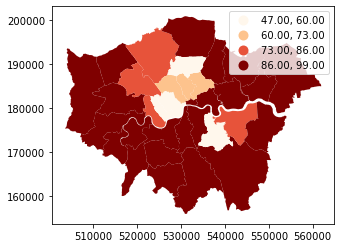

In [51]:
fig, ax = plt.subplots(1, 1)
test.plot(column='value', ax=ax, k=4,cmap='OrRd',legend=True,scheme='equalinterval')
#图例显示，展示的间隔都为13，不能区分大部分值在86-99之间的行政区。

## 自然间隔法

<AxesSubplot:>

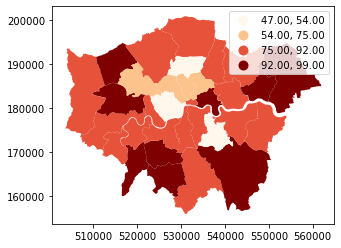

In [53]:
fig, ax = plt.subplots(1, 1)
test.plot(column='value', ax=ax, k=4,cmap='OrRd',legend=True,scheme='NaturalBreaks')
#聚类分级，间隔不等，区分度较好。

## 标准差法

<AxesSubplot:>

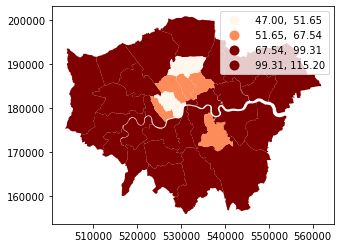

In [44]:
fig, ax = plt.subplots(1, 1)
test.plot(column='value', ax=ax, k=4,cmap='OrRd',legend=True,scheme='stdmean')

## 分位间隔法

<AxesSubplot:>

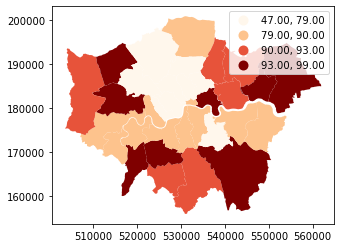

In [45]:
fig, ax = plt.subplots(1, 1)
test.plot(column='value', ax=ax, k=4,cmap='OrRd',legend=True,scheme='quantiles')
#每组数据个数一样，从数据展示上最能区分开，但不考虑数据的集中或离散分布特征。

## 自定义间隔法

<AxesSubplot:>

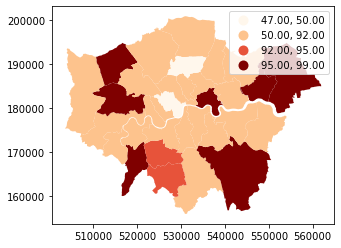

In [50]:
fig, ax = plt.subplots(1, 1)
test.plot(column='value', ax=ax, k=4,cmap='OrRd',legend=True,scheme='user_defined', classification_kwds={'bins':[50, 92, 95]})
#用户自定义断点，比如想看92-95之间的。